In [15]:
import pandas as pd

# Load historical data for midfielders
historical_data_path = '../_defense_analysis/data/cleaned/midfielder/midfielder_cleaned.csv'
historical_data = pd.read_csv(historical_data_path)

# Display the first few rows of the historical data to verify
historical_data.head()


,season_name,element_code,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,goals_conceded,...,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,id,first_name,second_name,unique_id
0,2023/24,535818,50,50,97,2220,6,1,4,38,...,173.4,25,4.19,3.26,7.45,36.64,113,Simon,Adingra,535818_2023/24
1,2012/13,39155,60,56,93,2230,3,5,4,42,...,0.0,0,0.00,0.00,0.00,0.00,463,Adam,Lallana,39155_2012/13
2,2013/14,39155,60,78,178,3086,9,9,16,41,...,0.0,0,0.00,0.00,0.00,0.00,463,Adam,Lallana,39155_2013/14
3,2014/15,39155,85,83,93,1779,5,3,9,22,...,0.0,0,0.00,0.00,0.00,0.00,463,Adam,Lallana,39155_2014/15
4,2015/16,39155,75,73,109,2109,4,6,10,27,...,0.0,0,0.00,0.00,0.00,0.00,463,Adam,Lallana,39155_2015/16


In [16]:
# Define relevant features to align with current data
historical_features = [
    'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
    'yellow_cards', 'red_cards', 'bonus', 'bps', 'influence', 'creativity',
    'threat', 'ict_index', 'expected_goals', 'expected_assists',
    'expected_goal_involvements', 'expected_goals_conceded', 'total_points'
]

# Select only the relevant features and handle missing values
historical_data = historical_data[historical_features].fillna(0)

# Display processed historical data
print(historical_data.columns)


Index(['minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'yellow_cards', 'red_cards', 'bonus', 'bps', 'influence', 'creativity',
       'threat', 'ict_index', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_conceded',
       'total_points'],
      dtype='object')


In [17]:
# Load current data for midfielders
current_data_path = '../data/processed/elements_processed.csv'
current_data = pd.read_csv(current_data_path)
midfielders_current = current_data[current_data['element_type'] == 3]

# Select relevant features from current data
current_features = [
    'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
    'yellow_cards', 'red_cards', 'bonus', 'bps', 'influence', 'creativity',
    'threat', 'ict_index', 'expected_goals', 'expected_assists',
    'expected_goal_involvements', 'expected_goals_conceded', 'total_points'
]

midfielders_current = midfielders_current[current_features].fillna(0)

# Combine current and historical data
combined_data = pd.concat([midfielders_current, historical_data], ignore_index=True)

# Display the combined dataset to verify
display(combined_data.head())
display(combined_data.shape)


,minutes,goals_scored,assists,clean_sheets,goals_conceded,yellow_cards,red_cards,bonus,bps,influence,creativity,threat,ict_index,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,total_points
0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0
1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0
2,170,0,0,2,0,0,0,0,27,20.0,63.5,35.0,11.8,0.08,0.60,0.68,2.24,7
3,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0
4,253,0,0,2,1,1,0,0,29,34.4,75.0,60.0,17.0,0.46,0.74,1.20,2.93,7


(1193, 18)

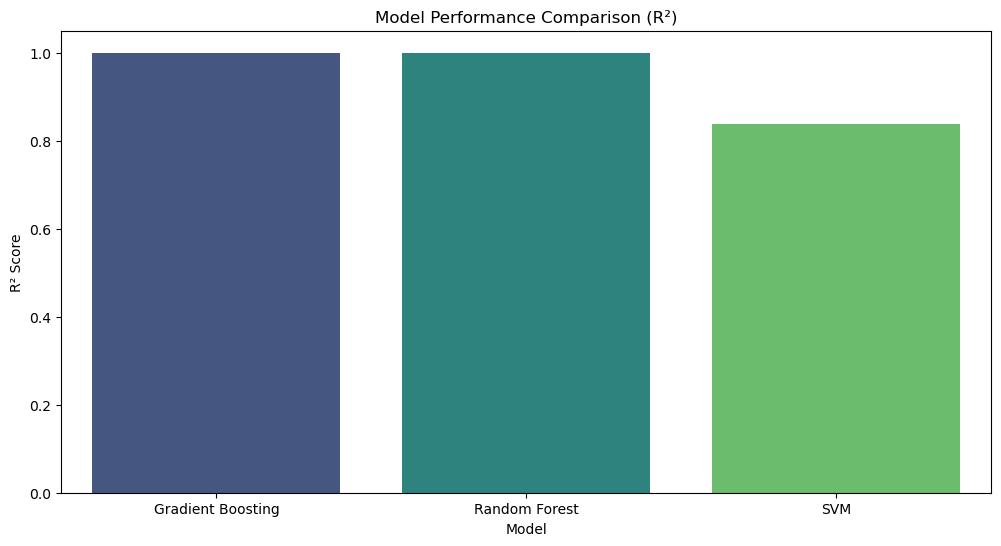

In [18]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Define the target variable
target = 'total_points'

# Split combined data into features and target
X = combined_data.fillna(0)  # Ensure no missing values remain
y = combined_data[target]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVM': SVR(kernel='rbf', C=1.0, epsilon=0.1)
}

# Train models and collect performance metrics
performance_metrics = []

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Save metrics
    performance_metrics.append({'Model': model_name, 'MAE': mae, 'MSE': mse, 'R2': r2})
    
    # Save the model
    joblib.dump(model, f'../models/trained_models/{model_name.replace(" ", "_").lower()}.pkl')

# Convert performance metrics to DataFrame
performance_df = pd.DataFrame(performance_metrics)

# Visualization: Performance Metrics Comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R2', data=performance_df, palette='viridis')
plt.title('Model Performance Comparison (R²)')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.show()


## Cross-Validation

In [19]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Define cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize models
models = {
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVM': SVR(kernel='rbf', C=1.0, epsilon=0.1)
}

# Collect cross-validation scores
cv_results = {}

for model_name, model in models.items():
    # Perform cross-validation
    scores = cross_val_score(model, X, y, scoring='r2', cv=cv)
    cv_results[model_name] = scores
    
    # Print results
    print(f"{model_name} Cross-Validation R² Scores: {scores}")
    print(f"Mean R²: {np.mean(scores):.4f}, Std Dev: {np.std(scores):.4f}")


Gradient Boosting Cross-Validation R² Scores: [0.99990213 0.99992052 0.99738881 0.99986078 0.9996647 ]
Mean R²: 0.9993, Std Dev: 0.0010
Random Forest Cross-Validation R² Scores: [0.99982734 0.99982225 0.99580409 0.99976895 0.99988753]
Mean R²: 0.9990, Std Dev: 0.0016
SVM Cross-Validation R² Scores: [0.83869026 0.84944506 0.81727819 0.85845661 0.83261489]
Mean R²: 0.8393, Std Dev: 0.0141


## Residual Analysis

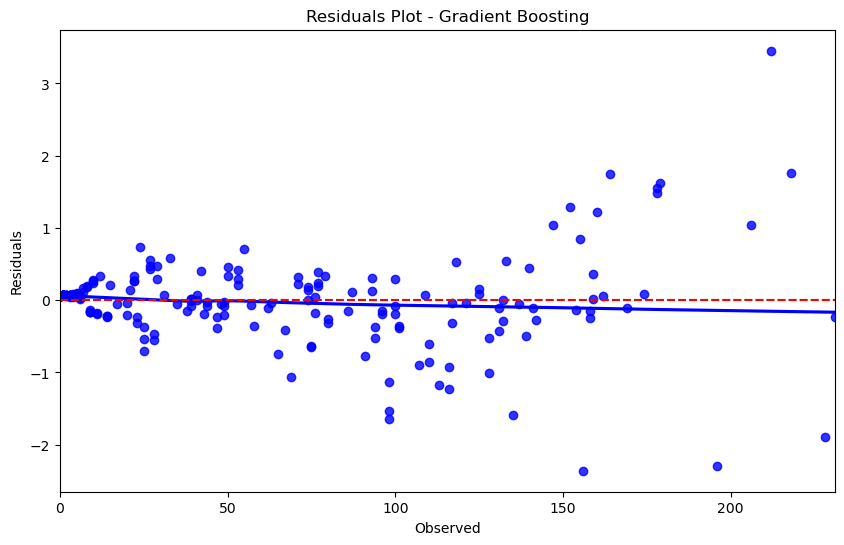

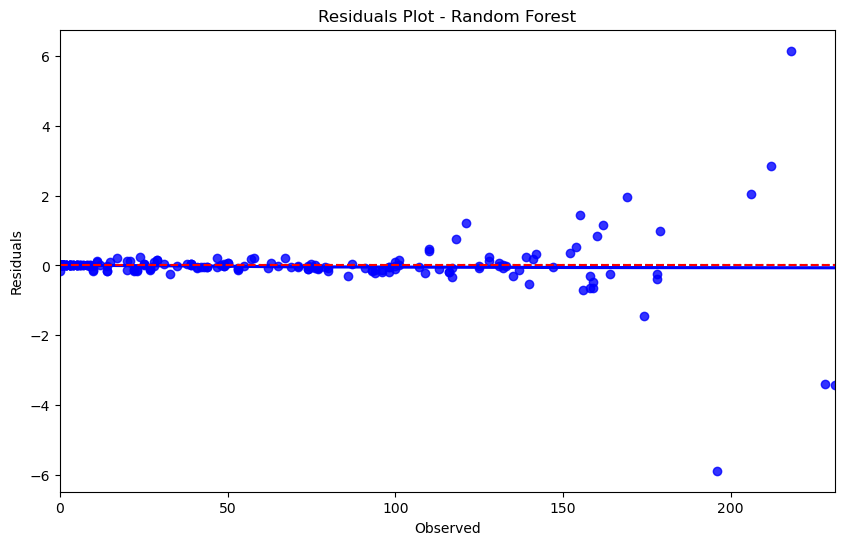

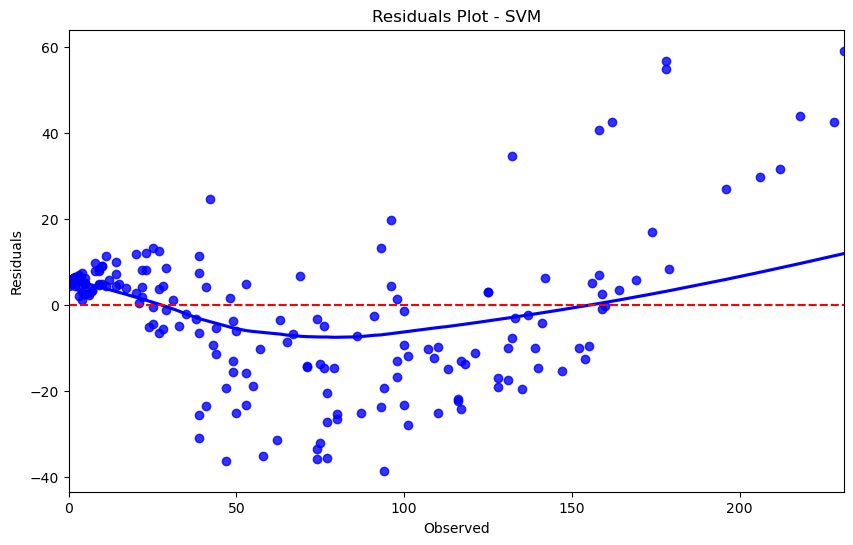

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Train the models using the combined data
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Residuals
    residuals = y_test - y_pred
    
    # Residual Plot
    plt.figure(figsize=(10, 6))
    sns.residplot(x=y_test, y=residuals, lowess=True, color='blue')
    plt.title(f'Residuals Plot - {model_name}')
    plt.xlabel('Observed')
    plt.ylabel('Residuals')
    plt.axhline(0, linestyle='--', color='red')
    plt.show()


## Feature importance analysis

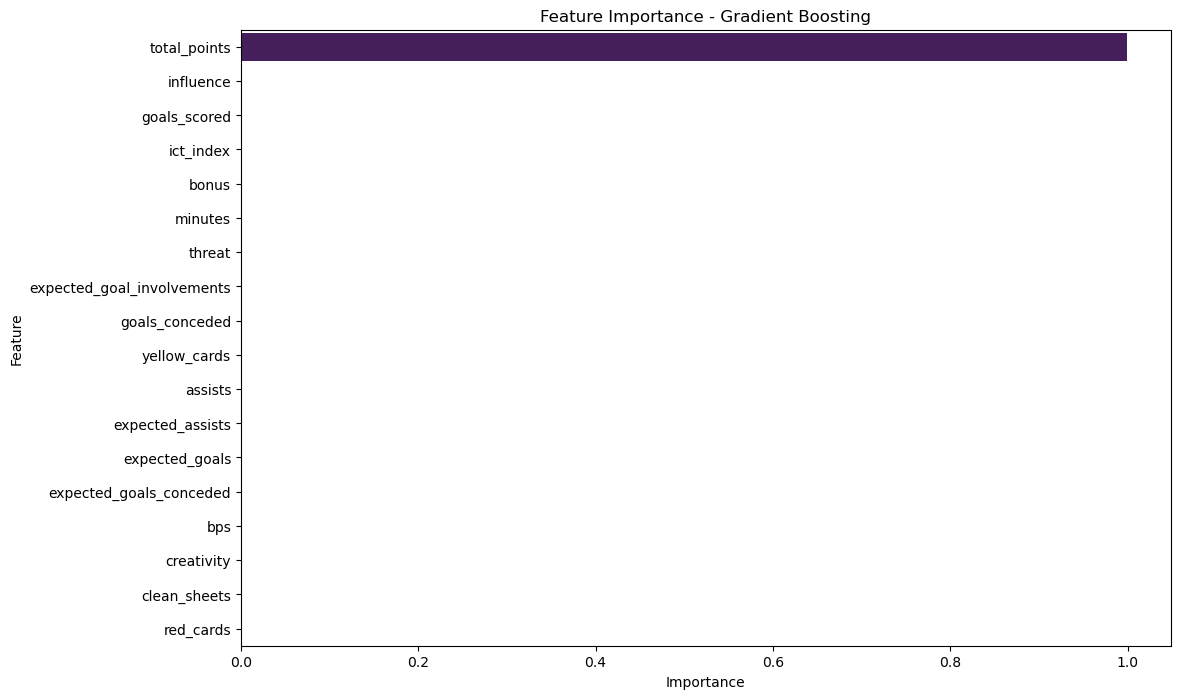

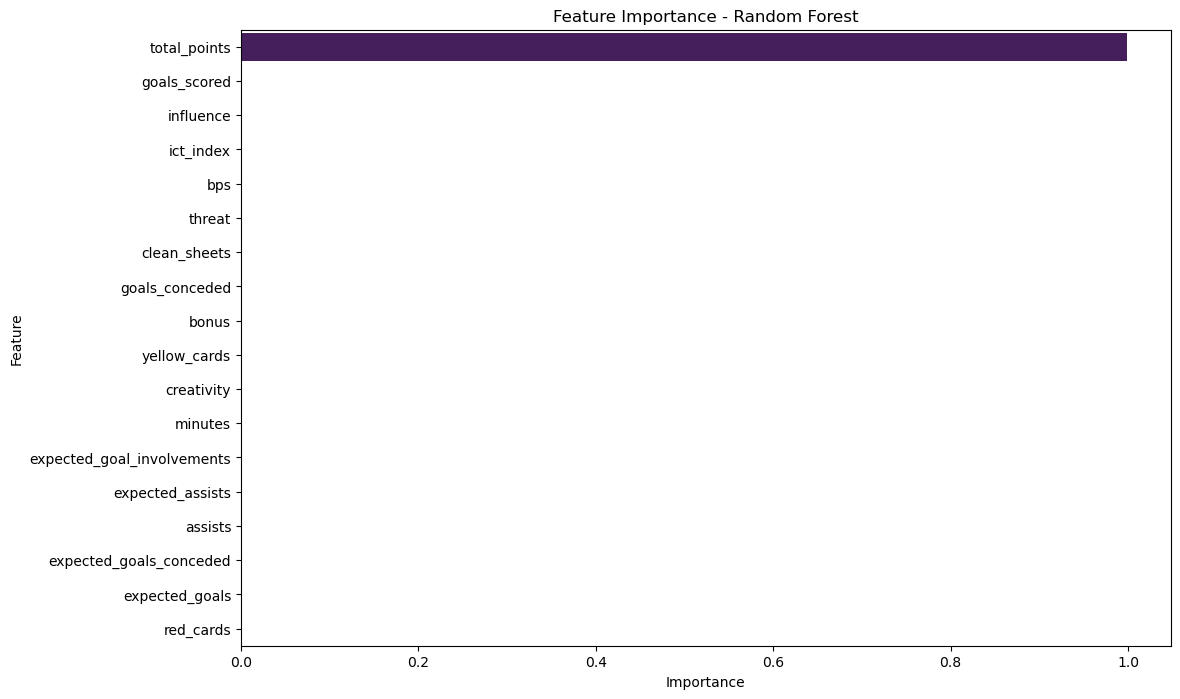

In [21]:
# Feature Importance for Gradient Boosting and Random Forest
tree_models = {'Gradient Boosting': models['Gradient Boosting'], 'Random Forest': models['Random Forest']}

for model_name, model in tree_models.items():
    # Plot Feature Importance
    feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
    plt.title(f'Feature Importance - {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()


/Users/robertoreis/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


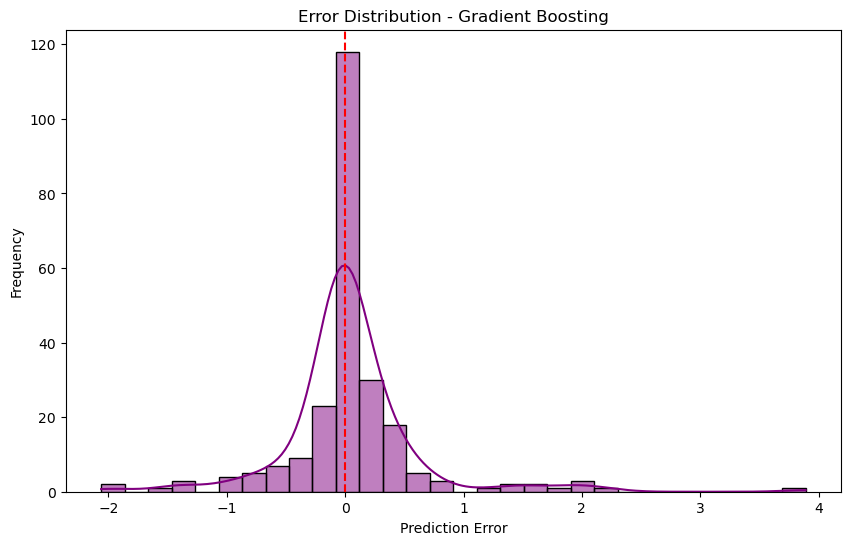

/Users/robertoreis/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


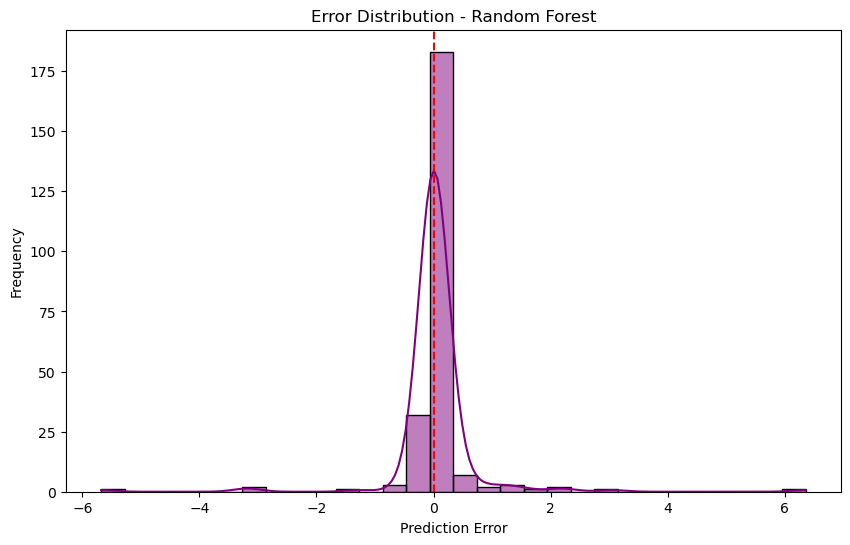

/Users/robertoreis/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


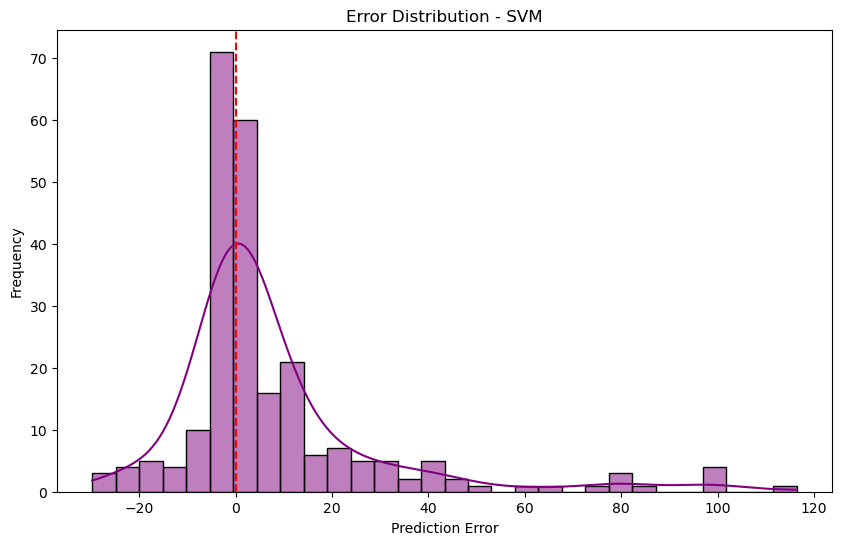

In [22]:
# Plotting Error Distribution
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    errors = y_test - y_pred
    
    plt.figure(figsize=(10, 6))
    sns.histplot(errors, kde=True, bins=30, color='purple')
    plt.title(f'Error Distribution - {model_name}')
    plt.xlabel('Prediction Error')
    plt.ylabel('Frequency')
    plt.axvline(0, linestyle='--', color='red')
    plt.show()


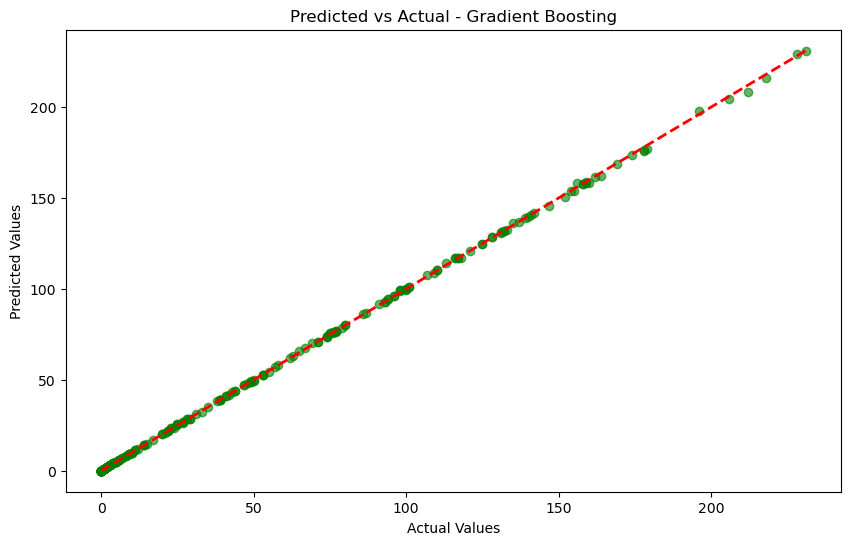

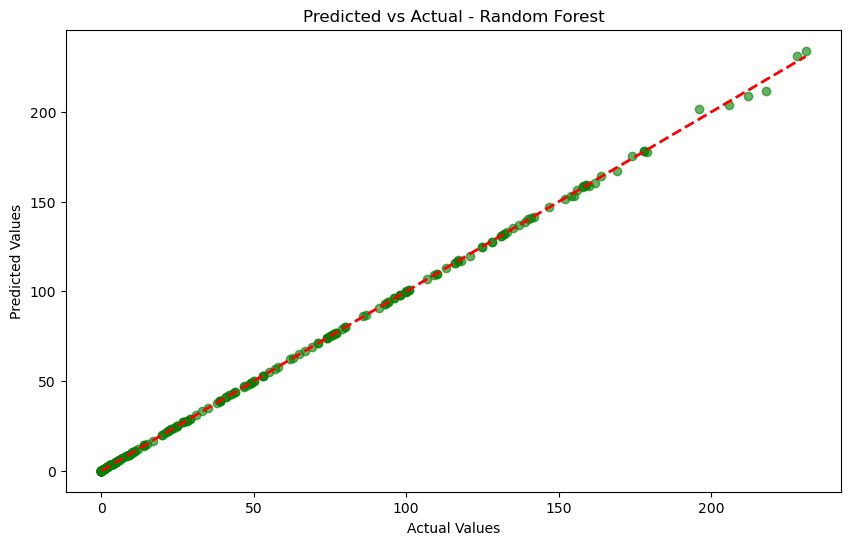

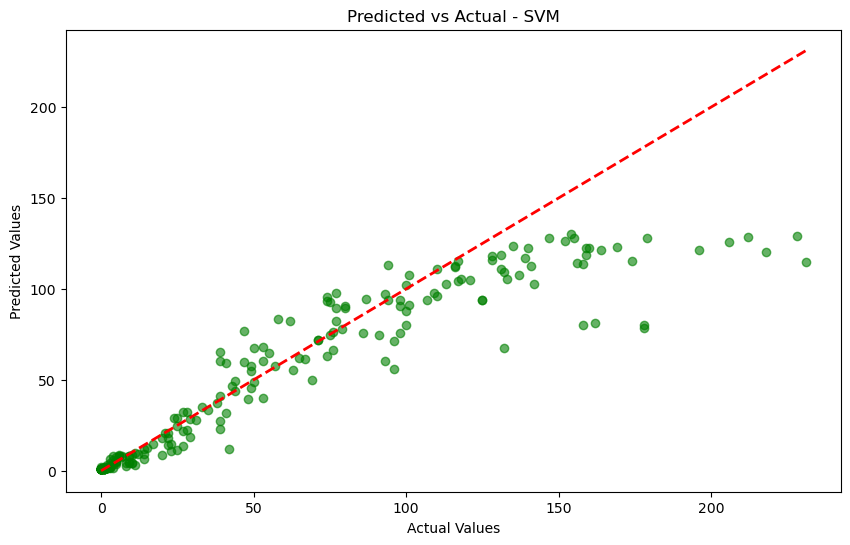

In [23]:
# Predicted vs Actual Plot
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, color='green')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
    plt.title(f'Predicted vs Actual - {model_name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()


## Key Defensive Contributions (KDC): 

Highlights defensive capabilities of midfielders, valuable for a holistic view of their contributions.

## Creative Pressure (CP): 

Focuses on a midfielder's ability to create under duress, distinguishing playmakers who thrive under pressure.

## Sustained Threat Index (STI): 

Captures persistent offensive involvement, identifying midfielders who are consistently active in threatening positions.

In [25]:
# Load the combined dataset
data_path = '../data/processed/elements_processed.csv'
midfielders = pd.read_csv(data_path)

# Print available columns
print("Available columns:")
print(midfielders.columns)

# Example feature calculations for KDC, CP, and STI using available columns
midfielders['key_defensive_contributions'] = (
    0.5 * midfielders['clean_sheets'] +
    0.3 * midfielders['goals_conceded'] +
    0.2 * midfielders['yellow_cards']
)

midfielders['creative_pressure'] = (
    0.4 * midfielders['assists'] +
    0.3 * midfielders['creativity'] +
    0.3 * midfielders['ict_index']
)

midfielders['sustained_threat_index'] = (
    0.5 * midfielders['expected_goals'] +
    0.3 * midfielders['threat'] +
    0.2 * midfielders['expected_goal_involvements']
)

# Display the first few rows to verify new features
print("\nNew features:")
print(midfielders[['key_defensive_contributions', 'creative_pressure', 'sustained_threat_index']].head())

Available columns:
Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id_x', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expected_goal_involvements'

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Define features, including the new ones
features = [
    'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
    'yellow_cards', 'red_cards', 'bonus', 'bps', 'influence', 'creativity',
    'threat', 'ict_index', 'expected_goals', 'expected_assists',
    'expected_goal_involvements', 'expected_goals_conceded',
    'key_defensive_contributions', 'creative_pressure', 'sustained_threat_index'
]

# Define the target variable
target = 'total_points'

# Prepare the data
X = midfielders[features].fillna(0)  # Fill missing values
y = midfielders[target]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the best model (Gradient Boosting)
best_model = GradientBoostingRegressor(random_state=42)

# Train the model with the new features
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Gradient Boosting with New Features - MAE: {mae:.4f}, MSE: {mse:.4f}, R²: {r2:.4f}')

# Save the updated model
joblib.dump(best_model, '../models/trained_models/gradient_boosting_with_new_features.pkl')


Gradient Boosting with New Features - MAE: 0.4601, MSE: 0.6805, R²: 0.9425


['../models/trained_models/gradient_boosting_with_new_features.pkl']

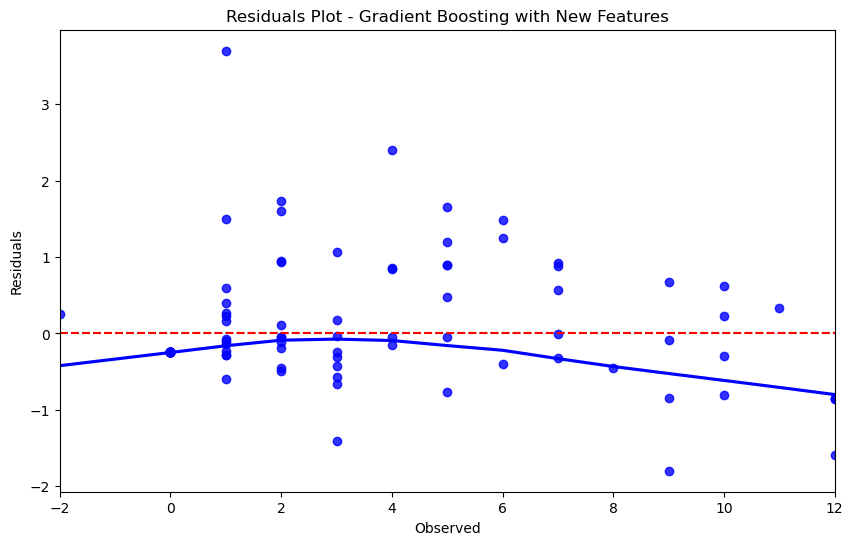

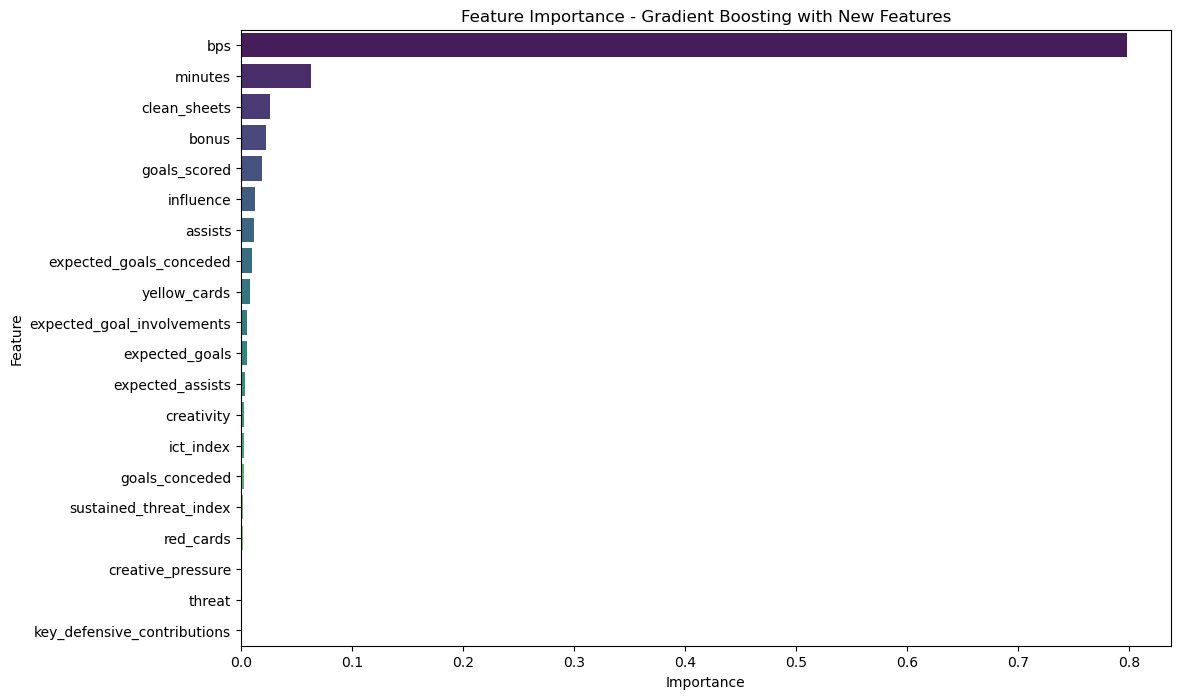

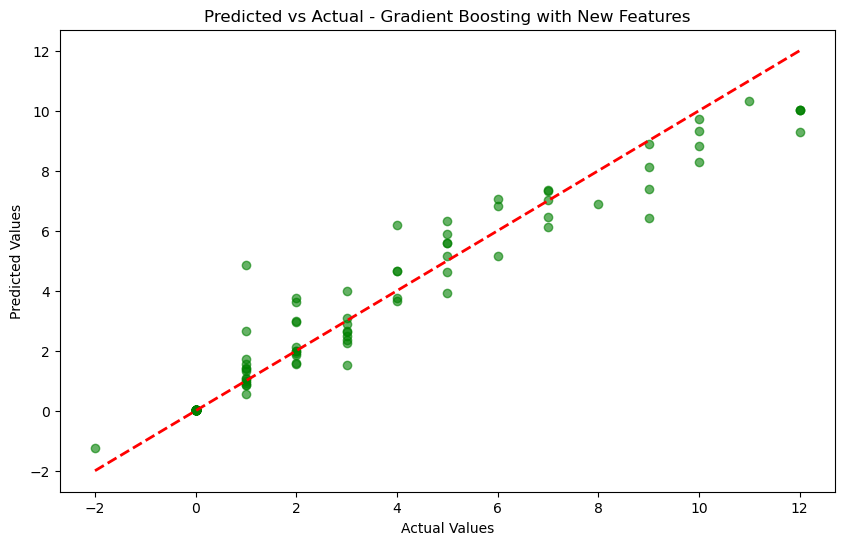

In [28]:
# Residual Plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, color='blue')
plt.title('Residuals Plot - Gradient Boosting with New Features')
plt.xlabel('Observed')
plt.ylabel('Residuals')
plt.axhline(0, linestyle='--', color='red')
plt.show()

# Feature Importance
feature_importance = pd.Series(best_model.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance - Gradient Boosting with New Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Predicted vs Actual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Predicted vs Actual - Gradient Boosting with New Features')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


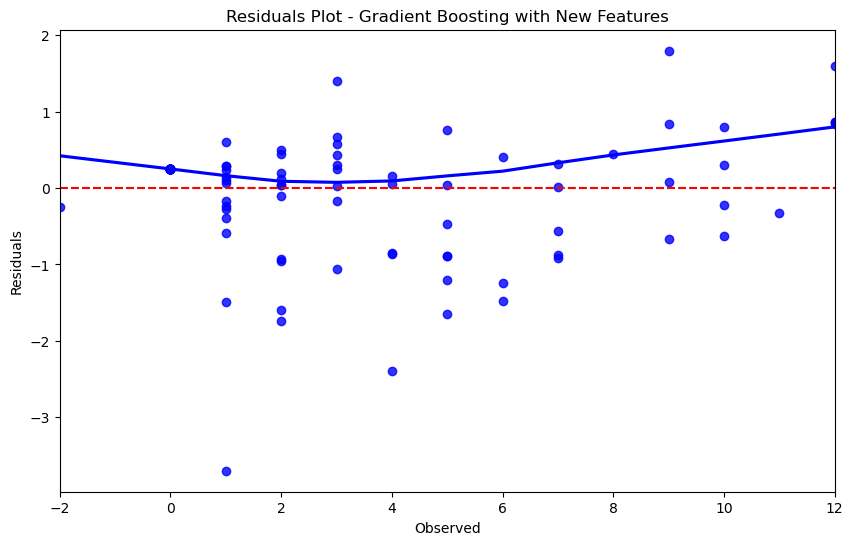

In [29]:
# Residual Plot
import seaborn as sns
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=residuals, lowess=True, color='blue')
plt.title('Residuals Plot - Gradient Boosting with New Features')
plt.xlabel('Observed')
plt.ylabel('Residuals')
plt.axhline(0, linestyle='--', color='red')
plt.show()


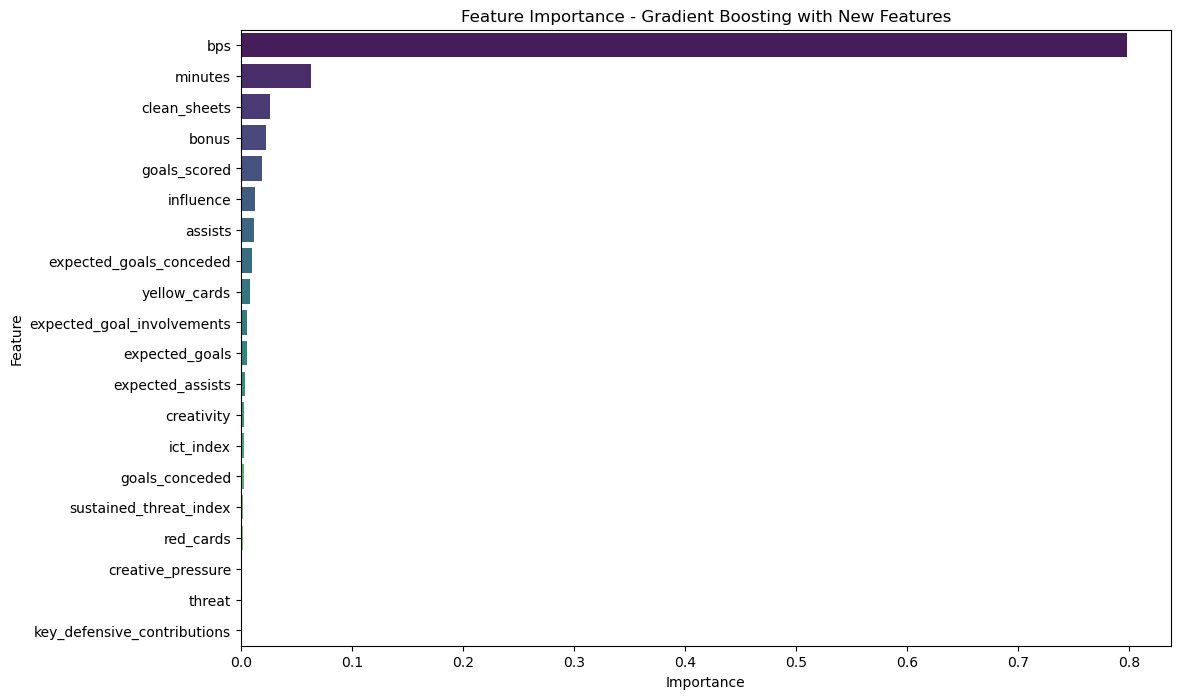

In [30]:
# Feature Importance Plot
import pandas as pd

feature_importance = pd.Series(best_model.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance - Gradient Boosting with New Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [31]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Cross-validation to validate the model performance
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_model, X, y, scoring='r2', cv=cv)

print(f'Cross-Validation R² Scores: {cv_scores}')
print(f'Mean R²: {np.mean(cv_scores):.4f}, Std Dev: {np.std(cv_scores):.4f}')


Cross-Validation R² Scores: [0.9425263  0.95069082 0.93605885 0.92442267 0.94393594]
Mean R²: 0.9395, Std Dev: 0.0089


In [32]:
# Updated feature list without 'bps'
features = [
    'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
    'yellow_cards', 'red_cards', 'bonus', 'influence', 'creativity',
    'threat', 'ict_index', 'expected_goals', 'expected_assists',
    'expected_goal_involvements', 'expected_goals_conceded',
    'key_defensive_contributions', 'creative_pressure', 'sustained_threat_index'
]

# Define the target variable
target = 'total_points'

# Prepare the data without 'bps'
X = midfielders[features].fillna(0)  # Fill missing values
y = midfielders[target]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting model
best_model = GradientBoostingRegressor(random_state=42)

# Train the model with the updated features
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate model performance without 'bps'
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Gradient Boosting without "bps" - MAE: {mae:.4f}, MSE: {mse:.4f}, R²: {r2:.4f}')

# Save the updated model
joblib.dump(best_model, '../models/trained_models/gradient_boosting_without_bps.pkl')


Gradient Boosting without "bps" - MAE: 0.6105, MSE: 1.1638, R²: 0.9016


['../models/trained_models/gradient_boosting_without_bps.pkl']

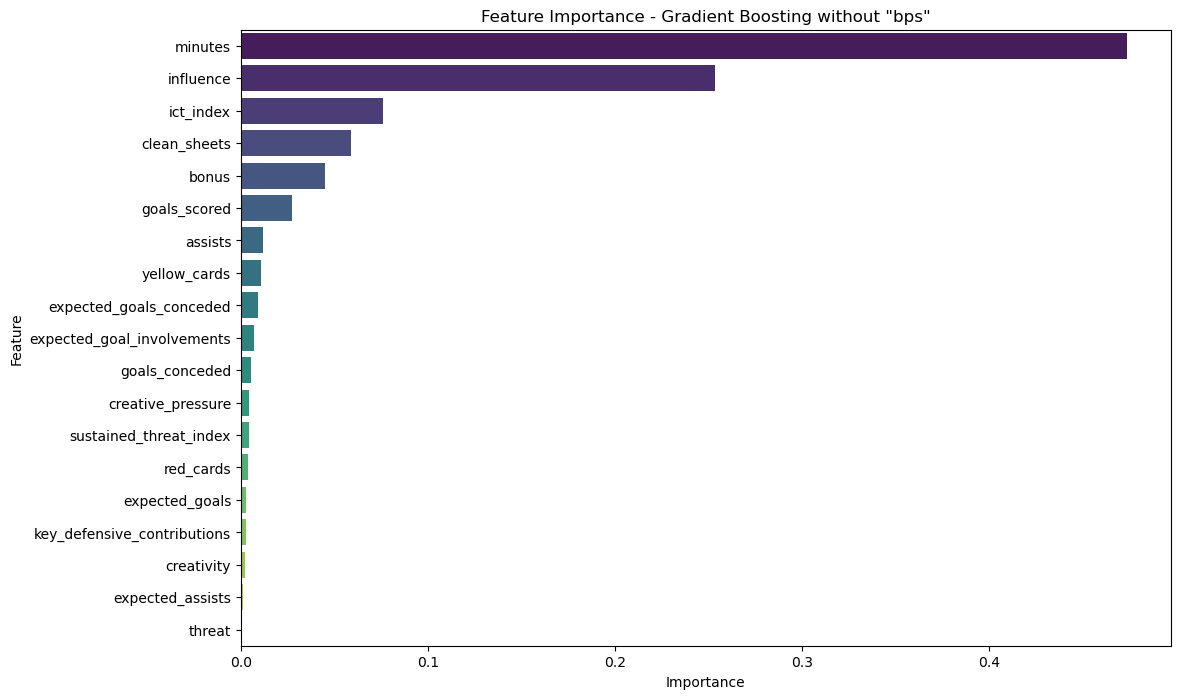

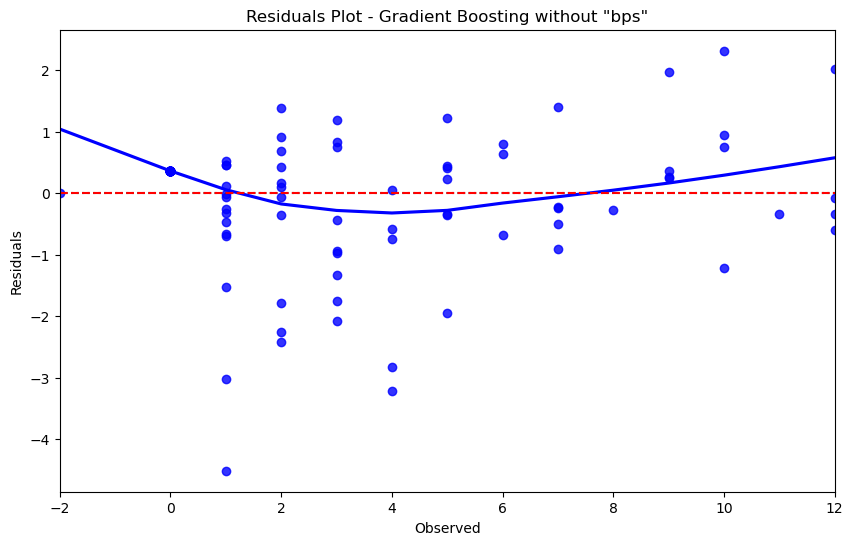

In [33]:
# Feature Importance Plot without 'bps'
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.Series(best_model.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance - Gradient Boosting without "bps"')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Residual Plot without 'bps'
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=residuals, lowess=True, color='blue')
plt.title('Residuals Plot - Gradient Boosting without "bps"')
plt.xlabel('Observed')
plt.ylabel('Residuals')
plt.axhline(0, linestyle='--', color='red')
plt.show()


Gradient Boosting with "Consistency Score" - MAE: 0.0941, MSE: 0.0147, R²: 0.3690


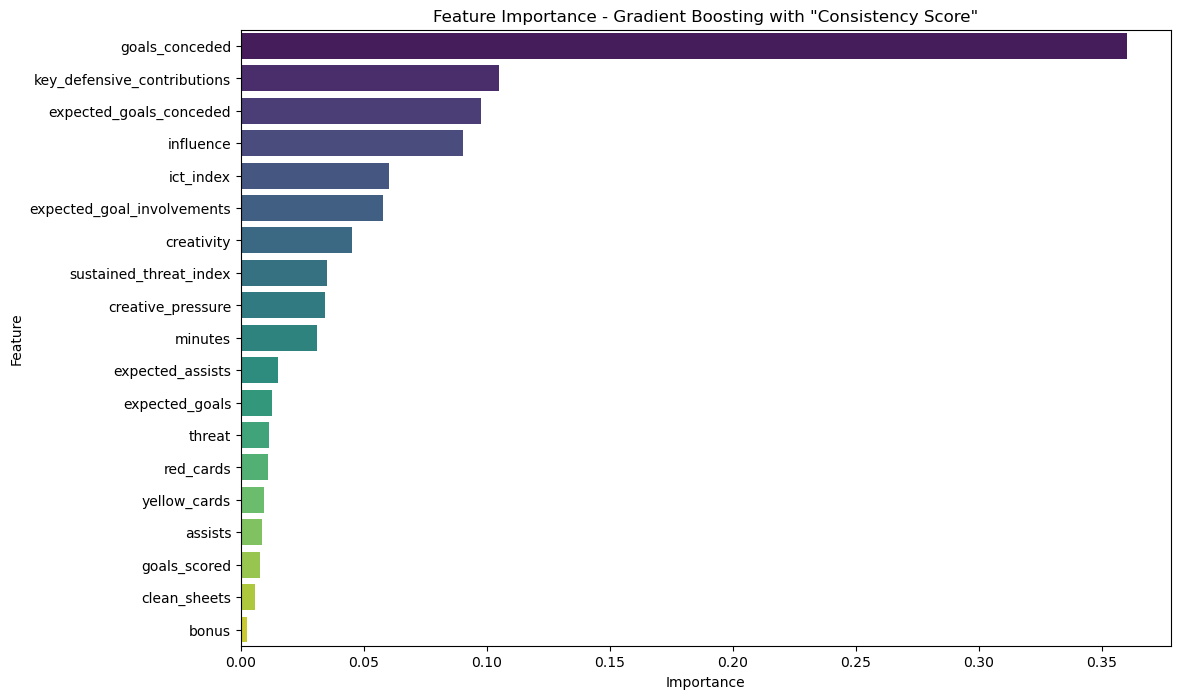

In [38]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load the dataset
data_path = '../data/processed/elements_processed.csv'
midfielders = pd.read_csv(data_path)

# Calculate new features
midfielders['key_defensive_contributions'] = (
    0.5 * midfielders['clean_sheets'] +
    0.3 * midfielders['goals_conceded'] +
    0.2 * midfielders['yellow_cards']
)

midfielders['creative_pressure'] = (
    0.4 * midfielders['assists'] +
    0.3 * midfielders['creativity'] +
    0.3 * midfielders['ict_index']
)

midfielders['sustained_threat_index'] = (
    0.5 * midfielders['expected_goals'] +
    0.3 * midfielders['threat'] +
    0.2 * midfielders['expected_goal_involvements']
)

# Calculate Consistency Score
midfielders['consistency_score'] = (
    0.4 * midfielders['goals_scored'].rolling(window=5).mean() +
    0.3 * midfielders['assists'].rolling(window=5).mean() +
    0.3 * midfielders['key_defensive_contributions'].rolling(window=5).mean()
).fillna(0)

# Define features and new target 'consistency_score'
features = [
    'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
    'yellow_cards', 'red_cards', 'bonus', 'influence', 'creativity',
    'threat', 'ict_index', 'expected_goals', 'expected_assists',
    'expected_goal_involvements', 'expected_goals_conceded',
    'key_defensive_contributions', 'creative_pressure', 'sustained_threat_index'
]

# New target variable: 'consistency_score'
target = 'consistency_score'

# Prepare the data
X = midfielders[features].fillna(0)  # Fill missing values
y = midfielders[target]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting model
model = GradientBoostingRegressor(random_state=42)

# Train the model with 'consistency_score' as the target
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Gradient Boosting with "Consistency Score" - MAE: {mae:.4f}, MSE: {mse:.4f}, R²: {r2:.4f}')

# Save the updated model
joblib.dump(model, '../models/trained_models/gradient_boosting_consistency_score.pkl')

# Feature Importance Plot
feature_importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance - Gradient Boosting with "Consistency Score"')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

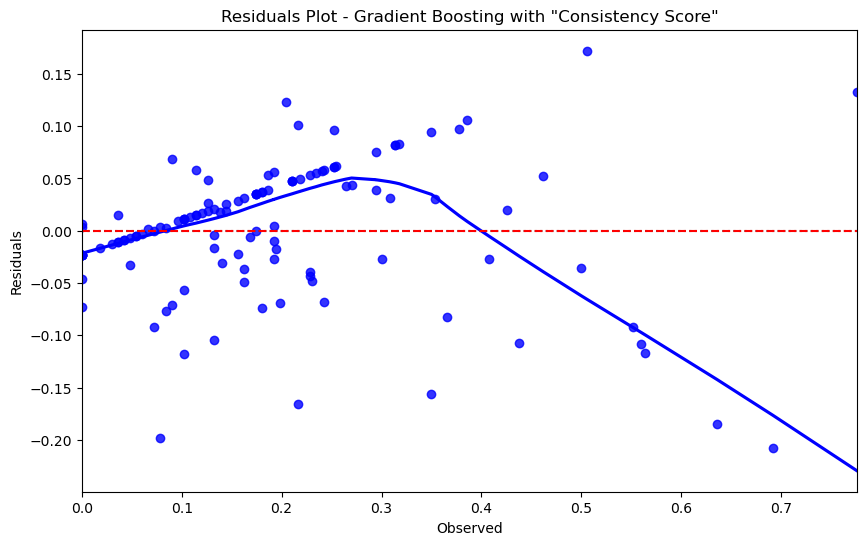

In [40]:

residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=residuals, lowess=True, color='blue')
plt.title('Residuals Plot - Gradient Boosting with "Consistency Score"')
plt.xlabel('Observed')
plt.ylabel('Residuals')
plt.axhline(0, linestyle='--', color='red')
plt.show()

Gradient Boosting with "Consistency Score" and Offensive Impact Score - MAE: 0.0937, MSE: 0.0142, R²: 0.3912


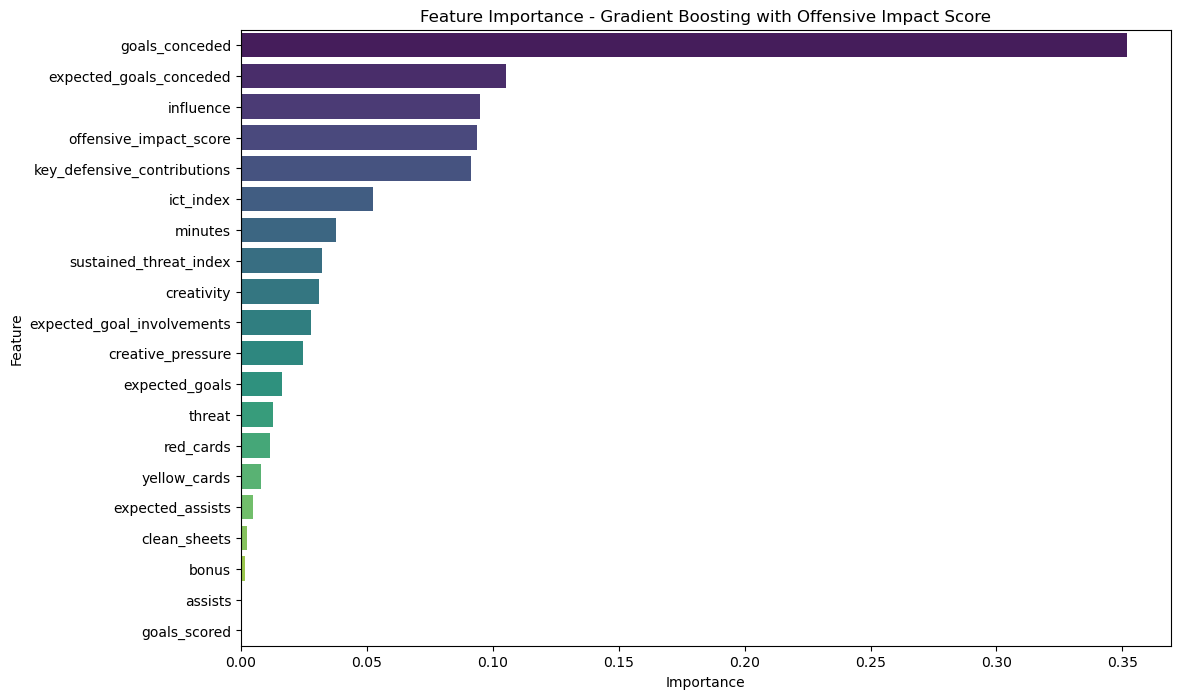

In [42]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Calculate Offensive Impact Score
midfielders['offensive_impact_score'] = (
    0.4 * midfielders['goals_scored'] +
    0.3 * midfielders['assists'] +
    0.3 * midfielders['expected_goal_involvements']
)

# Define features including the new 'offensive_impact_score'
features = [
    'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
    'yellow_cards', 'red_cards', 'bonus', 'influence', 'creativity',
    'threat', 'ict_index', 'expected_goals', 'expected_assists',
    'expected_goal_involvements', 'expected_goals_conceded',
    'key_defensive_contributions', 'creative_pressure', 'sustained_threat_index',
    'offensive_impact_score'
]

# Define the target variable, for example, using 'consistency_score' again
target = 'consistency_score'

# Prepare the data
X = midfielders[features].fillna(0)  # Fill missing values
y = midfielders[target]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting model
model = GradientBoostingRegressor(random_state=42)

# Train the model with 'consistency_score' as the target
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Gradient Boosting with "Consistency Score" and Offensive Impact Score - MAE: {mae:.4f}, MSE: {mse:.4f}, R²: {r2:.4f}')

# Save the updated model
joblib.dump(model, '../models/gradient_boosting_with_offensive_impact_score.pkl')

# Feature Importance Plot
feature_importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance - Gradient Boosting with Offensive Impact Score')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
